In [1]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2

In [2]:
! ls ../data/processed/classify-nn/0.11.0-202205220305
! cat ../data/processed/classify-nn/0.11.0-202205220305/metadata.json

classify.ckpt
embedding.ckpt
metadata.json
{
  "embedding_source": "data/intermediate/embedding/tile2vec-v5/version_10/checkpoints/epoch=2-step=5635.ckpt",
  "embedding_dim": 512,
  "created": "2022-05-21T21:00:20.860223"
}


In [40]:
from birdclef.models.classifier_nn.datasets import (
    ClassifierSimpleDataset,
    ToFloatTensor,
    ToEmbedSpace,
)
from birdclef.models.classifier_nn.model import ClassifierNet
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
import json
from torchvision import transforms
from torch.utils.data import DataLoader
import numpy as np

train_audio = Path("../data/raw/birdclef-2022/train_audio")
classify_root = Path("../data/processed/classify-nn/0.11.0-202205220305")
filter_set = json.loads(Path("../data/raw/birdclef-2022/scored_birds.json").read_text())


def predict(bird, train_audio, filter_set, classify_root):
    paths = list(train_audio.glob(f"{bird}/*.ogg"))
    metadata = json.loads((classify_root / "metadata.json").read_text())
    label_encoder = LabelEncoder()
    label_encoder.fit(["noise"] + filter_set)

    dataset = ClassifierSimpleDataset(
        paths[:1],
        label_encoder,
        transform=transforms.Compose(
            [
                ToFloatTensor(),
                ToEmbedSpace(
                    classify_root / "embedding.ckpt", z_dim=metadata["embedding_dim"]
                ),
            ]
        ),
    )
    model = ClassifierNet.load_from_checkpoint(
        classify_root / "classify.ckpt",
        z_dim=metadata["embedding_dim"],
        n_classes=len(label_encoder.classes_),
    )

    pred = None
    actual = None
    for X, y in DataLoader(dataset, batch_size=32):
        y_pred = model.to(X.device)(X).squeeze(1).detach().numpy()
        y = y.detach().numpy()
        print(y_pred.shape, y.shape)
        pred = np.vstack([pred, y_pred]) if pred is not None else y_pred
        actual = np.vstack([actual, y]) if actual is not None else y
    return pred, actual


pred, actual = predict(filter_set[0], train_audio, filter_set, classify_root)
pred.shape, actual.shape

stft hop length 1227
STFT kernels created, time used = 0.1880 seconds
STFT filter created, time used = 0.0040 seconds
Mel filter created, time used = 0.0040 seconds
MelSpectrogram(
  Mel filter banks size = (128, 2049), trainable_mel=True
  (stft): STFT(n_fft=4096, Fourier Kernel size=(2049, 1, 4096), iSTFT=False, trainable=True)
)
(6, 22) (6, 22)


((6, 22), (6, 22))

In [49]:
pred.argmax(axis=1), actual.argmax(axis=1)

(array([19, 19, 19, 19, 19, 19], dtype=int64),
 array([0, 0, 0, 0, 0, 0], dtype=int64))

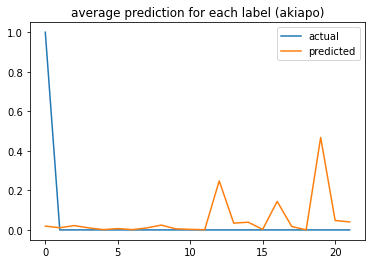

In [36]:
import matplotlib.pyplot as plt


def plot(bird, pred, actual):
    plt.title(f"average prediction for each label ({bird})")
    plt.plot(actual.mean(axis=0), label="actual")
    plt.plot(pred.mean(axis=0), label="predicted")
    plt.legend()
    plt.show()


plot(filter_set[0], pred, actual)

akiapo
stft hop length 1227
STFT kernels created, time used = 0.1902 seconds
STFT filter created, time used = 0.0030 seconds
Mel filter created, time used = 0.0030 seconds
MelSpectrogram(
  Mel filter banks size = (128, 2049), trainable_mel=True
  (stft): STFT(n_fft=4096, Fourier Kernel size=(2049, 1, 4096), iSTFT=False, trainable=True)
)
(6, 22) (6, 22)
entries:  (6, 22)


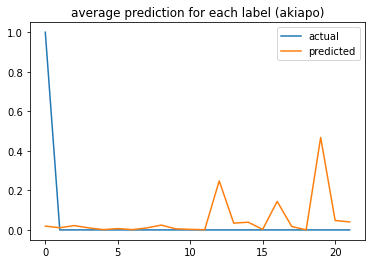

aniani
stft hop length 1227
STFT kernels created, time used = 0.1932 seconds
STFT filter created, time used = 0.0050 seconds
Mel filter created, time used = 0.0050 seconds
MelSpectrogram(
  Mel filter banks size = (128, 2049), trainable_mel=True
  (stft): STFT(n_fft=4096, Fourier Kernel size=(2049, 1, 4096), iSTFT=False, trainable=True)
)
(2, 22) (2, 22)
entries:  (2, 22)


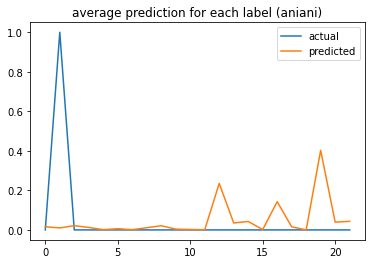

apapan
stft hop length 1227
STFT kernels created, time used = 0.1923 seconds
STFT filter created, time used = 0.0040 seconds
Mel filter created, time used = 0.0040 seconds
MelSpectrogram(
  Mel filter banks size = (128, 2049), trainable_mel=True
  (stft): STFT(n_fft=4096, Fourier Kernel size=(2049, 1, 4096), iSTFT=False, trainable=True)
)
(17, 22) (17, 22)
entries:  (17, 22)


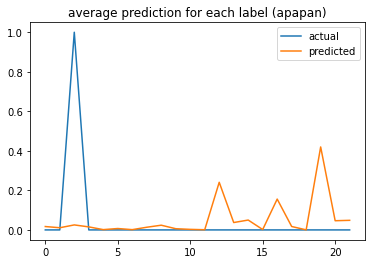

barpet
stft hop length 1227
STFT kernels created, time used = 0.2070 seconds
STFT filter created, time used = 0.0030 seconds
Mel filter created, time used = 0.0030 seconds
MelSpectrogram(
  Mel filter banks size = (128, 2049), trainable_mel=True
  (stft): STFT(n_fft=4096, Fourier Kernel size=(2049, 1, 4096), iSTFT=False, trainable=True)
)
(5, 22) (5, 22)
entries:  (5, 22)


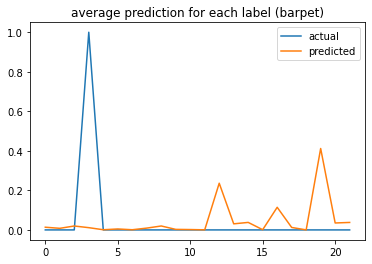

crehon
stft hop length 1227
STFT kernels created, time used = 0.2120 seconds
STFT filter created, time used = 0.0050 seconds
Mel filter created, time used = 0.0050 seconds
MelSpectrogram(
  Mel filter banks size = (128, 2049), trainable_mel=True
  (stft): STFT(n_fft=4096, Fourier Kernel size=(2049, 1, 4096), iSTFT=False, trainable=True)
)
(4, 22) (4, 22)
entries:  (4, 22)


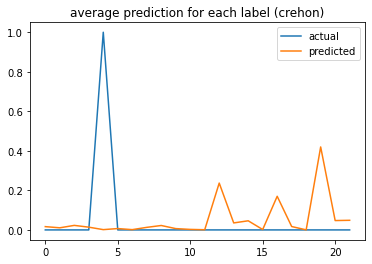

elepai
stft hop length 1227
STFT kernels created, time used = 0.1960 seconds
STFT filter created, time used = 0.0030 seconds
Mel filter created, time used = 0.0030 seconds
MelSpectrogram(
  Mel filter banks size = (128, 2049), trainable_mel=True
  (stft): STFT(n_fft=4096, Fourier Kernel size=(2049, 1, 4096), iSTFT=False, trainable=True)
)
(30, 22) (30, 22)
entries:  (30, 22)


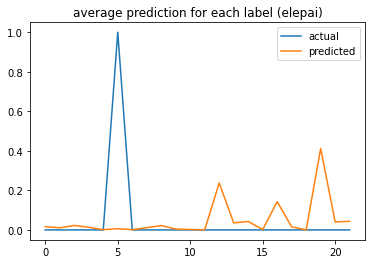

ercfra
stft hop length 1227
STFT kernels created, time used = 0.1962 seconds
STFT filter created, time used = 0.0040 seconds
Mel filter created, time used = 0.0040 seconds
MelSpectrogram(
  Mel filter banks size = (128, 2049), trainable_mel=True
  (stft): STFT(n_fft=4096, Fourier Kernel size=(2049, 1, 4096), iSTFT=False, trainable=True)
)
(4, 22) (4, 22)
entries:  (4, 22)


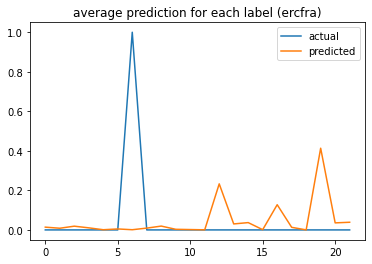

hawama
stft hop length 1227
STFT kernels created, time used = 0.1922 seconds
STFT filter created, time used = 0.0030 seconds
Mel filter created, time used = 0.0030 seconds
MelSpectrogram(
  Mel filter banks size = (128, 2049), trainable_mel=True
  (stft): STFT(n_fft=4096, Fourier Kernel size=(2049, 1, 4096), iSTFT=False, trainable=True)
)
(6, 22) (6, 22)
entries:  (6, 22)


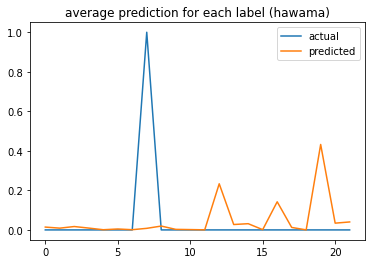

hawcre
stft hop length 1227
STFT kernels created, time used = 0.1880 seconds
STFT filter created, time used = 0.0030 seconds
Mel filter created, time used = 0.0040 seconds
MelSpectrogram(
  Mel filter banks size = (128, 2049), trainable_mel=True
  (stft): STFT(n_fft=4096, Fourier Kernel size=(2049, 1, 4096), iSTFT=False, trainable=True)
)
(21, 22) (21, 22)
entries:  (21, 22)


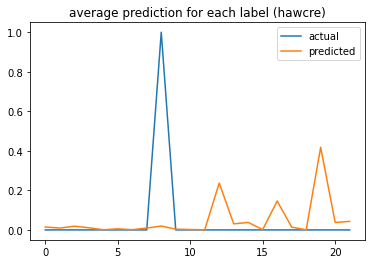

hawgoo
stft hop length 1227
STFT kernels created, time used = 0.1976 seconds
STFT filter created, time used = 0.0040 seconds
Mel filter created, time used = 0.0040 seconds
MelSpectrogram(
  Mel filter banks size = (128, 2049), trainable_mel=True
  (stft): STFT(n_fft=4096, Fourier Kernel size=(2049, 1, 4096), iSTFT=False, trainable=True)
)
(9, 22) (9, 22)
entries:  (9, 22)


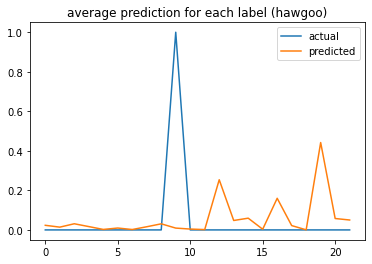

hawhaw
stft hop length 1227
STFT kernels created, time used = 0.2231 seconds
STFT filter created, time used = 0.0050 seconds
Mel filter created, time used = 0.0050 seconds
MelSpectrogram(
  Mel filter banks size = (128, 2049), trainable_mel=True
  (stft): STFT(n_fft=4096, Fourier Kernel size=(2049, 1, 4096), iSTFT=False, trainable=True)
)
(32, 22) (32, 22)
(19, 22) (19, 22)
entries:  (51, 22)


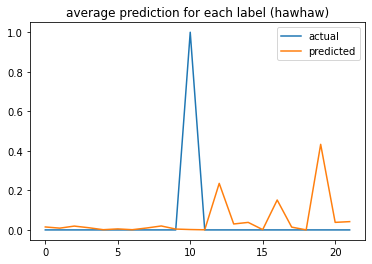

hawpet1
stft hop length 1227
STFT kernels created, time used = 0.2225 seconds
STFT filter created, time used = 0.0050 seconds
Mel filter created, time used = 0.0050 seconds
MelSpectrogram(
  Mel filter banks size = (128, 2049), trainable_mel=True
  (stft): STFT(n_fft=4096, Fourier Kernel size=(2049, 1, 4096), iSTFT=False, trainable=True)
)
(3, 22) (3, 22)
entries:  (3, 22)


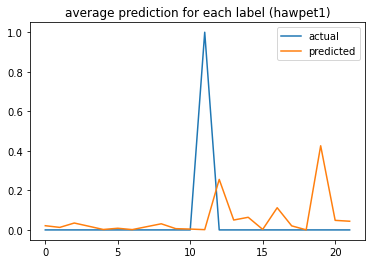

houfin
stft hop length 1227
STFT kernels created, time used = 0.1980 seconds
STFT filter created, time used = 0.0040 seconds
Mel filter created, time used = 0.0050 seconds
MelSpectrogram(
  Mel filter banks size = (128, 2049), trainable_mel=True
  (stft): STFT(n_fft=4096, Fourier Kernel size=(2049, 1, 4096), iSTFT=False, trainable=True)
)
(2, 22) (2, 22)
entries:  (2, 22)


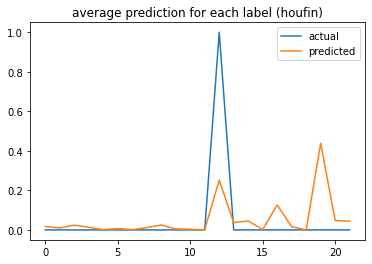

iiwi
stft hop length 1227
STFT kernels created, time used = 0.1979 seconds
STFT filter created, time used = 0.0041 seconds
Mel filter created, time used = 0.0041 seconds
MelSpectrogram(
  Mel filter banks size = (128, 2049), trainable_mel=True
  (stft): STFT(n_fft=4096, Fourier Kernel size=(2049, 1, 4096), iSTFT=False, trainable=True)
)
(8, 22) (8, 22)
entries:  (8, 22)


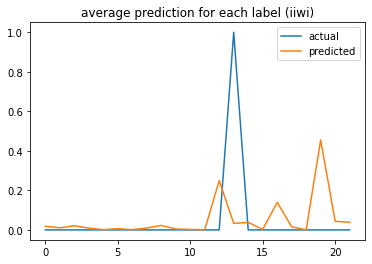

jabwar
stft hop length 1227
STFT kernels created, time used = 0.2027 seconds
STFT filter created, time used = 0.0030 seconds
Mel filter created, time used = 0.0030 seconds
MelSpectrogram(
  Mel filter banks size = (128, 2049), trainable_mel=True
  (stft): STFT(n_fft=4096, Fourier Kernel size=(2049, 1, 4096), iSTFT=False, trainable=True)
)
(32, 22) (32, 22)
(3, 22) (3, 22)
entries:  (35, 22)


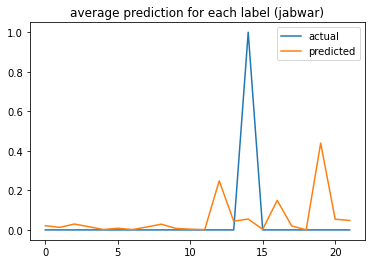

maupar
stft hop length 1227
STFT kernels created, time used = 0.2262 seconds
STFT filter created, time used = 0.0040 seconds
Mel filter created, time used = 0.0040 seconds
MelSpectrogram(
  Mel filter banks size = (128, 2049), trainable_mel=True
  (stft): STFT(n_fft=4096, Fourier Kernel size=(2049, 1, 4096), iSTFT=False, trainable=True)
)
(32, 22) (32, 22)
(18, 22) (18, 22)
entries:  (50, 22)


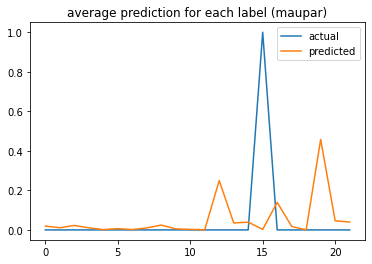

omao
stft hop length 1227
STFT kernels created, time used = 0.2215 seconds
STFT filter created, time used = 0.0050 seconds
Mel filter created, time used = 0.0050 seconds
MelSpectrogram(
  Mel filter banks size = (128, 2049), trainable_mel=True
  (stft): STFT(n_fft=4096, Fourier Kernel size=(2049, 1, 4096), iSTFT=False, trainable=True)
)
(9, 22) (9, 22)
entries:  (9, 22)


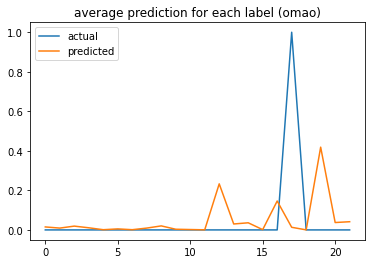

puaioh
stft hop length 1227
STFT kernels created, time used = 0.2063 seconds
STFT filter created, time used = 0.0050 seconds
Mel filter created, time used = 0.0050 seconds
MelSpectrogram(
  Mel filter banks size = (128, 2049), trainable_mel=True
  (stft): STFT(n_fft=4096, Fourier Kernel size=(2049, 1, 4096), iSTFT=False, trainable=True)
)
(6, 22) (6, 22)
entries:  (6, 22)


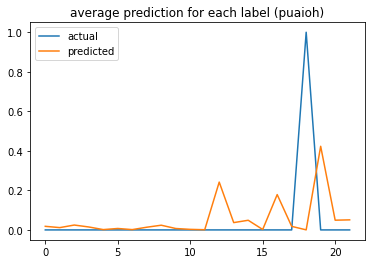

skylar
stft hop length 1227
STFT kernels created, time used = 0.1942 seconds
STFT filter created, time used = 0.0039 seconds
Mel filter created, time used = 0.0039 seconds
MelSpectrogram(
  Mel filter banks size = (128, 2049), trainable_mel=True
  (stft): STFT(n_fft=4096, Fourier Kernel size=(2049, 1, 4096), iSTFT=False, trainable=True)
)
(3, 22) (3, 22)
entries:  (3, 22)


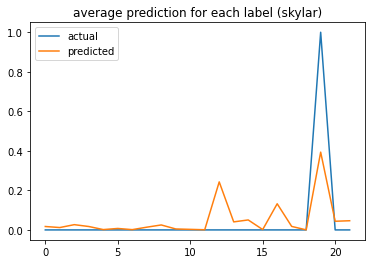

warwhe1
stft hop length 1227
STFT kernels created, time used = 0.2001 seconds
STFT filter created, time used = 0.0040 seconds
Mel filter created, time used = 0.0040 seconds
MelSpectrogram(
  Mel filter banks size = (128, 2049), trainable_mel=True
  (stft): STFT(n_fft=4096, Fourier Kernel size=(2049, 1, 4096), iSTFT=False, trainable=True)
)
(11, 22) (11, 22)
entries:  (11, 22)


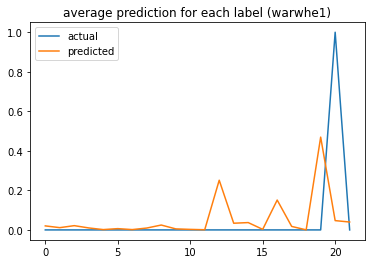

yefcan
stft hop length 1227
STFT kernels created, time used = 0.2040 seconds
STFT filter created, time used = 0.0050 seconds
Mel filter created, time used = 0.0050 seconds
MelSpectrogram(
  Mel filter banks size = (128, 2049), trainable_mel=True
  (stft): STFT(n_fft=4096, Fourier Kernel size=(2049, 1, 4096), iSTFT=False, trainable=True)
)
(3, 22) (3, 22)
entries:  (3, 22)


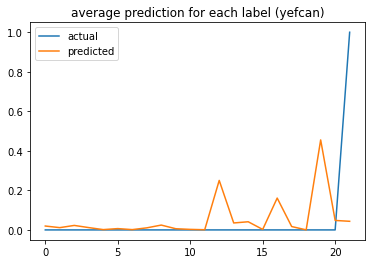

In [37]:
for bird in filter_set:
    print(bird)
    pred, actual = predict(bird, train_audio, filter_set, classify_root)
    print("entries: ", pred.shape)
    plot(bird, pred, actual)